### **Project :4 Build a Clustering model**

- Credit scoring and segmentation refer to the process of evaluating the creditworthiness of individuals or businesses and dividing them into distinct groups based on their credit profiles. It aims to assess the likelihood of borrowers repaying their debts and helps financial institutions make informed decisions regarding lending and managing credit risk.

- Credit scoring aims to determine the creditworthiness of individuals based on their credit profiles. By analysing factors such as payment history, credit utilization ratio, and number of credit accounts, we can assign a credit score to everyone, providing a quantitative measure of their creditworthiness. Credit Segmentation refers to the process of dividing the customers into groups based on their credit behaviour. The customers are divided into different segments based on their credit score, credit history, and other factors. The goal of this project is to segment customers into distinct groups based on their credit behaviour.

- The given dataset includes features such as age, gender, marital status, education level, employment status, credit utilization ratio, payment history, number of credit accounts, loan amount, interest rate, loan term, type of loan, and income level. Your task is to calculate credit scores and segment customers based on their credit scores, age, and gender to gain insights into different customer groups.

      Note: (i) Calculate credit scores by using FICO (Fair Isaac Corporation) scoring model.  
            (ii) Apply Clustering algorithms such as K-means and Agglomerative.

- **Dataset: credit_scoring.csv**

    `Data Description:`

- **Age**                         the age of the individual.

- **Gender**                      the gender of the individual

- **Marital Status**              the marital status of the individual.

- **Education Level**             the highest level of education  
                               attained by the individual.

- **Employment Status**         the current employment status of individual.

- **Credit Utilization Ratio**     the ratio of credit used by the individual compared to their total available credit limit

- **Payment History**           the monthly net payment behaviour of each customer, considering factors such as on-time payments, late payments, missed   payments, and defaults.

- **Number of Credit Accounts** the count of active credit accounts the person holds.

- **Loan Amount**                the monetary value of the loan

- **Interest Rate**              the interest rate associated with the loan.

- **Loan Term**                  the duration or term of the loan.

- **Type of Loan**               It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans

**Initial Guidelines:**

1. Ensure to follow to Use Id’s provided by UNext for naming file as conventions.
2. Create GitHub account and submit the GitHub link.

### Software Engineering aspect:  

Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.

### General Instructions

- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior
- The solution is to be written between the comments `# code starts here` and `# code ends here`
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- Before submitting the assessment, there should be `no error` while executing the notebook. If there are any error causing code, please comment it.
- The kernel of the Jupyter notebook is to be set as `Python 3 (ipykernel)` if not set already
- Include imports as necessary
- For each of the task, `Note` section will provide you hints to solve the problem.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

### Loading required libraries and packages 

#### NOTE:
Import various libraries and modules used in data analysis, machine learning, and visualization tasks in Python such as `pandas`, `numpy`, `sklearn`, `sklearn.preprocessing`,`seaborn`,`matplotlib`. 
- There are 2 ways to import the libraries and modules:
* import numpy as np
* from sklearn.model_selection import train_test_split

In [2]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering

### Task 1: Load the dataset and perform preliminary EDA with key observations and insights- (weightage - 20 marks)

#### T1.1: Load the Used_cars_sales dataset using try and except blocks. (weightage - 2 marks) (AE)  

#### NOTE:

Loading the dataset for model building is the initial step in the machine learning pipeline, where the relevant data is imported into the chosen programming environment or framework. This process typically involves reading the dataset from a file (e.g., CSV, Excel, JSON) or fetching it from a database. Once loaded, the dataset is often inspected to understand its structure, including the number of samples, features, and target variables. Furthermore, preprocessing steps such as cleaning, handling missing values, encoding categorical variables, and scaling may be performed on the dataset to prepare it for model training. Loading the dataset accurately and efficiently is crucial for building accurate and robust machine learning models that effectively capture the underlying patterns and relationships within the data.

* Load the dataset named `credit_scoring.csv` into a DataFrame named credit.
* Do not use PRINT statement inside the Except Block. Please use `return` statement only

In [3]:
def load_the_dataset():
    credit = None
    # code starts here
    try:
        credit = pd.read_csv('credit_scoring.csv')
    except FileNotFoundError:
        return "File Not Found"
    except Exception as e:
        return f"An error occured: {e}"
    # code ends here
    return credit

In [4]:
# store the result of the dataset
credit=load_the_dataset()
credit.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828,2,3289000,6.28,36,Personal Loan



#### T1.2: How many males and females in Gender column? (weightage - 2 marks)  (AE)                    

#### NOTE:
To check how many males and females in Gender column, calculate the value counts of the 'Gender' column in a given DataFrame data using the value_counts() method on the 'Gender' column of the DataFrame data. 

In [5]:
def get_Gender_value_counts(data):
    Gender_value_counts = None
    #Code starts here
    Gender_value_counts = data["Gender"].value_counts()
    #Code ends here
    return Gender_value_counts

In [6]:
get_Gender_value_counts(credit)

Male      501
Female    499
Name: Gender, dtype: int64

#### T1.3: Check missing values in the data in terms of percentage using error handling technique and do missing value treatment. (weightage - 2 marks)       (AE)        

#### NOTE:
Find the percentage of missing values in the data by dividing the total number of missing values by the total number of rows and multiplying by 100, you will get the percentage of missing values for each column. 

Use `isnull().sum()` to calculate the total number of missing values in each column and `shape[0]` to get the total number of rows in the DataFrame.

In [7]:
def missing_value(data):
    missing_percentage = None
    # Code starts here
    # Calculate percentage of missing values for each column
    missing_percentage = data.isnull().mean() * 100
    # Display percentage of missing values

    # Code ends here
    return missing_percentage

In [8]:
missing_value(credit)

Age                          0.0
Gender                       0.0
Marital Status               0.0
Education Level              0.0
Employment Status            0.0
Credit Utilization Ratio     0.0
Payment History              0.0
Number of Credit Accounts    0.0
Loan Amount                  0.0
Interest Rate                0.0
Loan Term                    0.0
Type of Loan                 0.0
dtype: float64

#### T1.4: Detect Outliers in the data and do outlier treatment. Plot a boxplot to visualize outliers in the data. (weightage – 3 marks) (ME)

#### NOTE:
- A boxplot is a statistical visualization tool that provides a graphical summary of the distribution of a continuous variable through its five-number summary: minimum, first quartile (Q1), median (second quartile or Q2), third quartile (Q3), and maximum. It is particularly useful for identifying outliers and comparing distributions between different groups or categories.

- Detecting outliers and performing outlier treatment is an essential data preprocessing step in machine learning model building. Outliers are data points that significantly deviate from the rest of the dataset and can distort the results of statistical analyses and machine learning algorithms. 

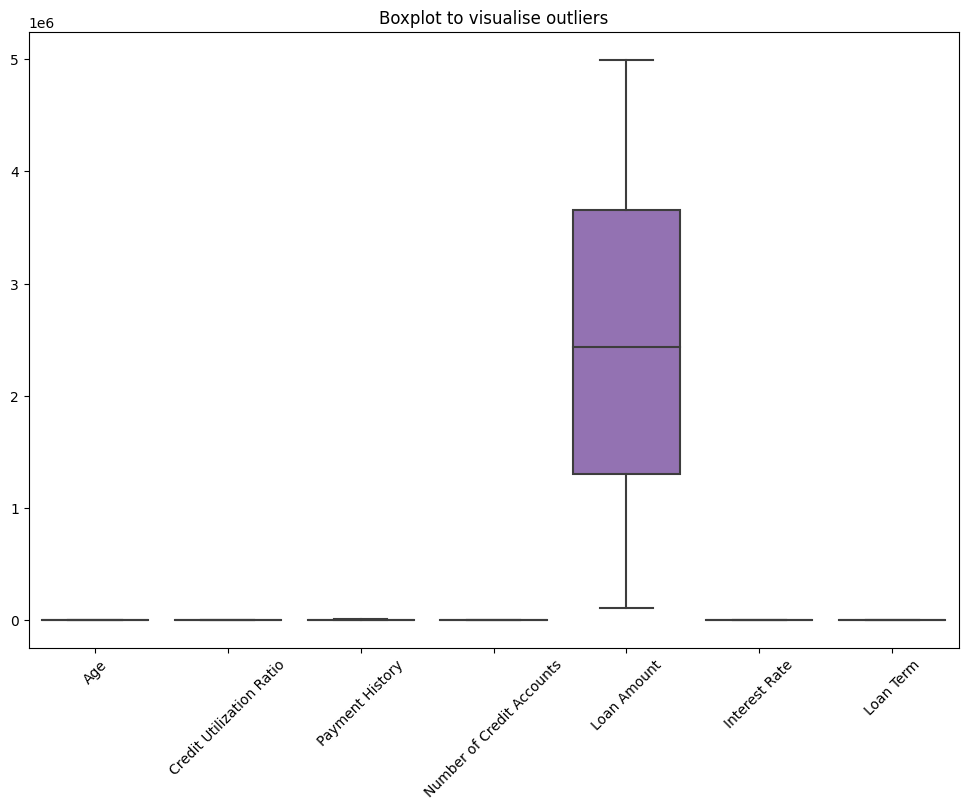

In [9]:
# plot a boxplot to visualize outliers in the data
def detect_outliers(data):
    outliers = {}
    for col in data.select_dtypes(include = [np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]

    return outliers

outliers = detect_outliers(credit)

plt.figure(figsize=(12,8))
sns.boxplot(data=credit.select_dtypes(include=[np.number]).dropna(axis=1, how='all'))
plt.title("Boxplot to visualise outliers")
plt.xticks(rotation= 45)
plt.show()

#### T1.5: Implement the FICO score method to calculate credit scores. (weightage - 4 marks) (AE)                          
 **Apply the FICO formula to calculate the credit score**

    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)  

**Calculating Credit Scores**

The dataset doesn’t have any feature representing the credit scores of individuals. To calculate the credit scores, we need to use FICO score, a commonly used credit scoring model in the industry.

#### NOTE:

The FICO Score is a credit scoring model developed by the Fair Isaac Corporation (FICO) and is widely used by lenders to evaluate the credit risk of individuals applying for credit. It is a numerical representation of an individual's creditworthiness and is based on various factors derived from their credit report. These factors typically include payment history, amounts owed, length of credit history, new credit accounts, and types of credit used.

* Apply LabelEncoder to the categorical features such as `Education Level` and `Employment Status`

In [10]:
## Change of Code here
def apply_label_encoder(data):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Apply LabelEncoder to categorical features
    data['Education Level'] = label_encoder.fit_transform(data['Education Level'])
    data['Employment Status'] = label_encoder.fit_transform(data['Employment Status'])
    
        
    return data

In [11]:
credit_data = apply_label_encoder(credit)
credit_data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,2,0,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,1,2,0.20,2371,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,2,0,0.22,2771,6,957000,2.76,12,Auto Loan
3,58,Female,Married,3,2,0.12,1371,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,0,1,0.99,828,2,3289000,6.28,36,Personal Loan


#### Credit score calculation

#### NOTE:
* Calculate credit scores for individuals based on various features and adds these scores as a new column to the dataset. For each row in the dataset, relevant features such as payment history, credit utilization ratio, number of credit accounts, education level, and employment status should be extracted.
* Using The FICO formula calculate the credit score for each individual.
* Scale the credit score to the desired range [300, 900] 
* Append the `credit_score` as a new column to the dataframe.

In [12]:
# Calculate credit scores using the complete FICO formula
def credit_score_cal(data):
    credit_scores = []

    # Code starts here
    min_score = 300
    max_score = 900

    # Apply the FICO formula to calculate the credit score
    for index, row in data.iterrows():
        credit_score =  ((row["Payment History"]*0.35) + (row["Credit Utilization Ratio"]*0.30) + (row["Number of Credit Accounts"]*0.15) + (row["Education Level"]*0.10) + (row["Employment Status"]*0.10))
        credit_score = min(max_score, max(min_score, credit_score))
        credit_scores.append(credit_score)

    # Scale the credit score to the desired range [300, 900]
    

    # Add the credit scores as a new column to the DataFrame
    data['Credit_Score'] = credit_scores
    
    # Code ends here
    return data

In [13]:
credit_data = credit_score_cal(credit_data)

In [14]:
credit_data.Credit_Score.value_counts()

300.000    281
900.000    122
390.415      2
661.335      1
441.607      1
          ... 
581.785      1
321.714      1
661.030      1
770.850      1
360.901      1
Name: Credit_Score, Length: 598, dtype: int64

#### T1.6: Which variables are significant in credit scoring? To answer this question, it is important to understand the correlation between the different variables. i.e., how much the other features effect the credit scoring. (Bivariate analysis)                           (weightage - 4 marks)   (AE)

#### NOTE:
- Calculate the correlation matrix for a given DataFrame df using the `corr` function of pandas

- Correlation between two variables measures the strength and direction of their relationship in a dataset. It quantifies how changes in one variable correspond to changes in another variable. A correlation coefficient value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable also tends to increase.
- Conversely, a correlation coefficient value close to -1 indicates a strong negative correlation, where one variable tends to decrease as the other variable increases. A correlation coefficient value close to 0 suggests little to no linear relationship between the variables.
-  Use this function `corr` to compute correlations between numerical variables and the target variable by passing the DataFrame containing the variables of interest


In [15]:
# define a function to Correlation between numerical variables and target variable
def corr(df):
    correlation = None
    # Code starts here
    correlation = df.corr()
    
    # Code ends here    
    return correlation

In [16]:
corr(credit_data)

/tmp/ipykernel_2969/150790620.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,Age,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Credit_Score
Age,1.000000,0.010536,0.034260,0.001308,-0.003114,-0.050672,0.034114,0.032867,0.021395,-0.008770
Education Level,0.010536,1.000000,-0.043000,0.000203,-0.037921,0.032890,-0.006067,0.003318,-0.049655,-0.032160
Employment Status,0.034260,-0.043000,1.000000,0.036413,-0.024883,-0.049489,0.032971,-0.009093,-0.044069,-0.022645
Credit Utilization Ratio,0.001308,0.000203,0.036413,1.000000,0.002114,-0.001842,-0.014918,0.048237,-0.022924,0.003301
Payment History,-0.003114,-0.037921,-0.024883,0.002114,1.000000,0.025022,-0.019084,-0.017618,-0.045532,0.973419
Number of Credit Accounts,-0.050672,0.032890,-0.049489,-0.001842,0.025022,1.000000,0.032232,-0.001083,0.012794,0.016226
Loan Amount,0.034114,-0.006067,0.032971,-0.014918,-0.019084,0.032232,1.000000,0.045288,0.014283,-0.016387
Interest Rate,0.032867,0.003318,-0.009093,0.048237,-0.017618,-0.001083,0.045288,1.000000,0.028190,-0.005758
Loan Term,0.021395,-0.049655,-0.044069,-0.022924,-0.045532,0.012794,0.014283,0.028190,1.000000,-0.058539
Credit_Score,-0.008770,-0.032160,-0.022645,0.003301,0.973419,0.016226,-0.016387,-0.005758,-0.058539,1.000000


#### NOTE:
- A heatmap is a graphical representation of data where values in a matrix are represented as colors. In data analysis and visualization, heatmaps are commonly used to visualize the correlation matrix, where each cell in the matrix represents the correlation coefficient between two variables. Heatmaps use color gradients to indicate the magnitude of correlation:
- warmer colors (such as red or orange) represent higher positive correlations, while cooler colors (such as blue or green) represent higher negative correlations.
- Using the heatmap function of sns library you can generate the Heatmap. Use the correlataion matrix to generate the heatmap.

/tmp/ipykernel_2969/150790620.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


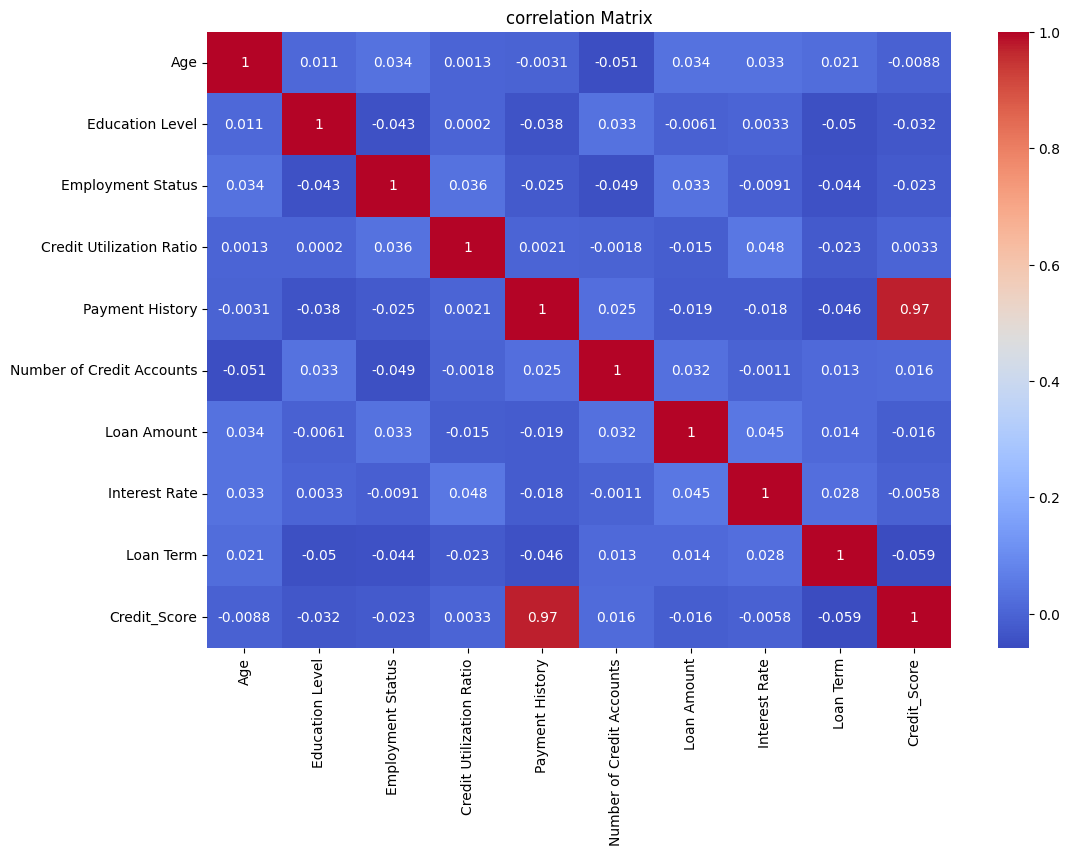

In [17]:
correlation_matrix = corr(credit_data)

plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("correlation Matrix")
plt.show()

#### T1.7: Select the features for determine the creditworthiness [Age, Gender, Credit_Score]. Display numerical and categorical variables. (weightage - 2 marks)   (AE)

#### NOTE:
- Features are crucial components in machine learning model building. They represent the measurable characteristics or attributes of the data that are used to make predictions or classifications. Here's how features are helpful in machine learning model building
- Well-chosen features can significantly impact the performance of the machine learning model. Including relevant features and excluding noise or irrelevant features can improve the model's predictive accuracy, reduce overfitting, and enhance its ability to generalize to new, unseen data.
- Use the function `find_numerical_categorical_columns(df)`which separates the columns of a DataFrame df into numerical and categorical columns and returns them as lists

In [18]:
credit_data=credit_data[['Age','Gender','Credit_Score']]

In [19]:
def find_numerical_categorical_columns(df):
    numerical_cols = []
    categorical_cols = []
    
    # Code starts here
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

    # Code ends here
    return numerical_cols, categorical_cols


In [20]:
numerical_cols, categorical_cols=find_numerical_categorical_columns(credit_data)

In [21]:
#Display numerical columns
numerical_cols

['Age', 'Credit_Score']

In [22]:
# Display categorical columns
categorical_cols

['Gender']

#### T1.8: Handling categorical features: Apply one hot encoding technique to convert categorical variable into numerical. Apply scaling technique.                                          (weightage - 5 marks)    (AE)  

#### NOTE:
Handling categorical features is an essential aspect of machine learning model building, especially when dealing with datasets that contain non-numeric data types. Categorical features represent qualitative variables that can take on a limited, fixed number of distinct values or categories. Here are some common techniques for handling categorical features

- `One-Hot Encoding`: One-hot encoding is a technique used to convert categorical variables into a binary matrix where each category becomes a separate binary column (feature). In this encoding scheme, for each categorical feature, if the category is present, it is represented as a 1 in the corresponding column; otherwise, it is represented as a 0. One-hot encoding is useful for algorithms that cannot directly handle categorical data and require numeric input.

Regarding scaling techniques to convert categorical variables to numerical ones, scaling is typically applied to continuous numerical features rather than categorical ones. However, if you're looking to scale encoded categorical variables for normalization or standardization purposes, you can apply techniques such as:
- `Min-Max Scaling`: Min-max scaling rescales the numerical values of a feature to a fixed range, usually between 0 and 1.
- `Standardization (Z-score normalization)`: Standardization transforms the data to have a mean of 0 and a standard deviation of 1.

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
def preprocess_data(df, numeric_features, categorical_features):
    transformed_df = None
    """
    Preprocess the data by performing one-hot encoding and scaling on numerical features.

    Parameters:
    - df: DataFrame containing the data.
    - numeric_features: List of names of numerical features.
    - categorical_features: List of names of categorical features.

    Returns:
    - transformed_df: DataFrame with preprocessed data.
    """
    
    # One-hot encode categorical features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))
    ])

    # Standardize numerical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy = 'mean')),
        ('scaler', StandardScaler())
    ])

    # Concatenate one-hot encoded and scaled numerical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    transformed_data = preprocessor.fit_transform(df)

    num_features_transformed = numeric_features
    cat_features_transformed = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

    transformed_df = pd.DataFrame(transformed_data, columns=np.concatenate([num_features_transformed, cat_features_transformed]))
    
    return transformed_df

In [24]:
credit_data=preprocess_data(credit_data,numerical_cols,categorical_cols)
print(credit_data)

          Age  Credit_Score  Gender_Male
0    1.304512      1.562359          1.0
1   -1.334979      1.260668          1.0
2   -0.957909      1.562359          0.0
3    1.153684     -0.286021          0.0
4   -0.807081     -1.082504          1.0
..        ...           ...          ...
995  1.229098     -0.415681          1.0
996  1.606168      0.463335          1.0
997  1.530754      1.562359          0.0
998  0.625785     -0.638846          0.0
999 -0.430011     -0.814046          0.0

[1000 rows x 3 columns]


#### T1.9: Save the cleaned dataset (transformed_df.csv file) in your GitHub repository for model building process. (This task is for maintaining the version control of datasets) --- (weightage - 1 mark)      (ME) 

In [25]:
credit_data.to_csv('transformed_df.csv', index=False)

#### NOTE:
Git is a distributed version control system (DVCS) widely used for tracking changes in source code during software development. It allows multiple developers to collaborate on projects, keep track of changes, and maintain a history of modifications. 
- `Version Control`: Version control is the management of changes to documents, files, or any set of information over time. It allows users to track modifications, revert to previous versions if needed, and collaborate effectively. Version control systems (VCS) automate the process of tracking changes and managing different versions of files.
- The cleaned data set should be saved as `transformed_df.csv` in the `Project` folder on the Desktop.

### Task 2: Build Clustering model for Segmentation based on credit score. (weightage - 30 marks)               

#### T2.1: Load the cleaned dataset and scaling the data (weightage – 2 marks) (AE)

#### NOTE:

- Cleaning the dataset involves handling missing values, outliers, and encoding categorical variables into numerical form. Missing values can be removed or imputed, outliers can be detected and adjusted, and categorical variables can be encoded using techniques like one-hot encoding or label encoding. 
- Scaling the data involves rescaling numerical features to a similar scale using techniques like min-max scaling or standardization. Scaling ensures that no single feature dominates the learning process due to differences in scale and can improve the performance of machine learning algorithms. 
- load the dataset from a CSV file named `transformed_df.csv` located at the specified path.
- Design the Function to load your dataset into your environment

In [26]:
def load_the_cleaned_dataset(dataset_location : str):
        transformed_df = None
        # Code starts here
        transformed_df = pd.read_csv(dataset_location)
        # Code ends here
        return transformed_df

In [27]:
dataset_location = 'transformed_df.csv'
transformed_df=load_the_cleaned_dataset(dataset_location)

In [28]:
transformed_df.head()

,Age,Credit_Score,Gender_Male
0,1.304512,1.562359,1.0
1,-1.334979,1.260668,1.0
2,-0.957909,1.562359,0.0
3,1.153684,-0.286021,0.0
4,-0.807081,-1.082504,1.0


#### T2.2: Find the optimal number of clusters using 'The Elbow' for K-means and using dendrogram plot for Agglomerative clustering.(weightage – 4 marks) (ME)

#### NOTE:

- The elbow method is a technique used to determine the optimal number of clusters for KMeans clustering algorithm. It works by plotting the within-cluster sum of squares (inertia) as a function of the number of clusters (K). The plot typically exhibits a downward trend, where inertia decreases as the number of clusters increases. 
- However, at some point, adding more clusters does not significantly reduce inertia, resulting in a curve that resembles an elbow. The optimal number of clusters is often chosen at the point where the rate of decrease in inertia sharply decreases, indicating diminishing returns for adding more clusters. 
- Design the Function `plot_elbow` to plot the elbow curve to determine the optimal number of clusters using the KMeans algorithm.

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_elbow(X, max_clusters=10):
    """
    Plot the elbow curve to determine the optimal number of clusters using KMeans.

    Parameters:
    - X: The feature matrix (numpy array or pandas DataFrame) for clustering.
    - max_clusters: The maximum number of clusters to consider (default is 10).

    Returns:
    - None (plots the elbow curve).
    """
    # Initialize a list to store inertia values
    inertia_values = []

    # Test different values of K
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(8,6))
    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.show()  



/home/labuser/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/labuser/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/labuser/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/labuser/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

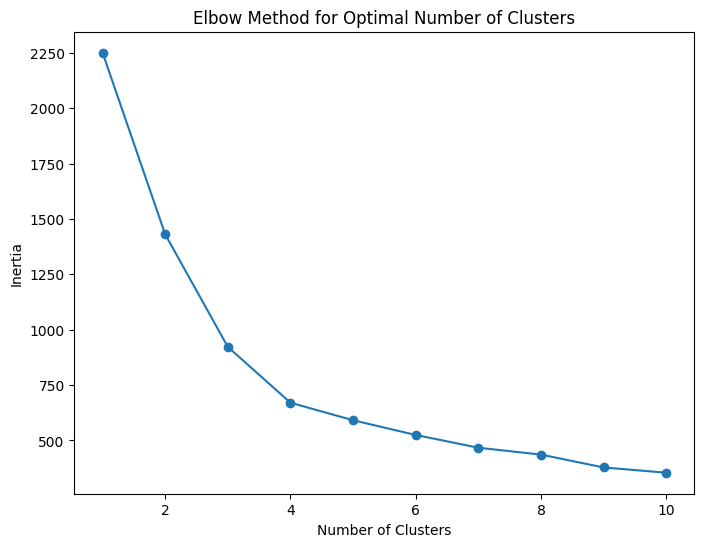

In [30]:
plot_elbow(transformed_df)

##### Using dendrogram

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(data):
    """
    Plot a dendrogram to visualize hierarchical clustering.

    Parameters:
    - data: DataFrame containing the data.
    - selected_variables: List of names of variables to use for clustering.

    Returns:
    - None (plots the dendrogram).
    """
    # Prepare data

    linked = linkage(data, method = 'ward')

    # Perform hierarchical clustering
    

    # Plot dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title("Dendrogram for Hierarchial Clustring")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()


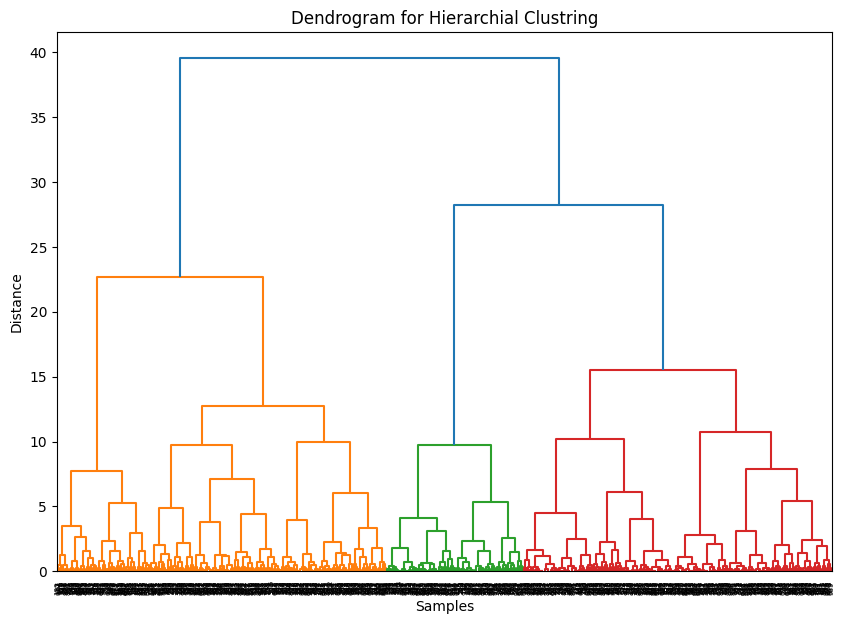

In [32]:
plot_dendrogram(transformed_df)

#### T2.3: Build a Clustering model on data using K-means and Agglomerative clustering algorithm. (weightage - 16 marks) (AE)

#### NOTE:

- Building a clustering model on data using K-means and Agglomerative clustering algorithms involves partitioning the data into groups based on similarities between data points. K-means clustering aims to partition the data into a predetermined number of clusters by minimizing the within-cluster sum of squares. 
- It iteratively assigns data points to the nearest cluster centroid and updates the centroids until convergence. Agglomerative clustering, on the other hand, is a hierarchical clustering algorithm that starts with each data point as its own cluster and merges clusters iteratively based on their proximity until a stopping criterion is met. 
- Both algorithms offer different approaches to clustering and can be applied based on the nature of the data and the desired clustering outcome. Evaluating clustering performance and selecting the appropriate algorithm based on the data characteristics are essential steps in building effective clustering models.
- Design the Function `model()` to performs KMeans clustering on the given data and adds cluster labels to the DataFrame.

In [33]:
def model(data,  n_clusters=4):
     clustered_data = None
     # Select only the columns needed for clustering
     

     # Perform KMeans clustering
     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
     cluster_labels = kmeans.fit_predict(data)

     # Add cluster labels to the DataFrame
     clustered_data = data.copy()
     clustered_data['Cluster'] = cluster_labels

     return clustered_data 

In [34]:
K_model=model(transformed_df)

/home/labuser/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
print(K_model)

          Age  Credit_Score  Gender_Male  Cluster
0    1.304512      1.562359          1.0        0
1   -1.334979      1.260668          1.0        2
2   -0.957909      1.562359          0.0        2
3    1.153684     -0.286021          0.0        3
4   -0.807081     -1.082504          1.0        1
..        ...           ...          ...      ...
995  1.229098     -0.415681          1.0        3
996  1.606168      0.463335          1.0        0
997  1.530754      1.562359          0.0        0
998  0.625785     -0.638846          0.0        3
999 -0.430011     -0.814046          0.0        1

[1000 rows x 4 columns]


In [36]:
K_model.to_csv("cluster1.csv")

#### Agglomerative clustering algorithm
- Design the Function `build_agglomerative_model()` to build an agglomerative clustering model using the AgglomerativeClustering class from scikit-learn.
- Build Agglomerative Clustering model using the AgglomerativeClustering Class from sklearn package.
- Create a copy of the input DataFrame, `clustered_data` and add a new column named 'Cluster' containing the predicted cluster labels.
- return the clustered_data

In [37]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

def build_agglomerative_model(data,  n_clusters=4):
    clustered_data = None
    """
    Build an agglomerative clustering model.

    Parameters:
    - data: DataFrame containing the data.
    - n_clusters: Number of clusters.

    Returns:
    - clustered_data: DataFrame with cluster labels added.
    """

    # Prepare data
    

    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(data)

    # Output segmentation: Add predicted cluster labels to the dataset
    clustered_data = data.copy()
    clustered_data["Cluster"] = cluster_labels

    return clustered_data


In [38]:
agg_model=build_agglomerative_model(transformed_df)

#### T2.4 Model versioning  (weightage - 3 marks) (ME)

Save the initial version of a clustering model (KMeans) codebase named 'kmeans’ and agglomerative codebase named 'agglomerative' to a version control system GitHub using git commands for collaboration, tracking changes, and ensuring transparency in model development.    (weightage- 3 marks) (ME)

#### Refer to the Github document from Lumen to create the repository and steps to commit 

#### Add your Github repository link below

### Task 3: Evaluate the performance of the model using the right evaluation metrics. (weightage - 35 marks)

#### T3.1. Bring the initial version of a clustering model ‘kmeans’ and second version ‘agglomerative’ from a GitHub using git commands and evaluate the model.   (weightage -2 marks) (ME) 

#### T3.2: Evaluate the Clustering models (K-means and Agglomerative clustering) with silhouette score. (weightage - 6 marks) (AE)

#### NOTE:

- The silhouette score measures the cohesion and separation of clusters, with higher scores indicating better-defined clusters. 
- Design the function `evaluate_kmeans_silhouette()` to calculates the silhouette score for a KMeans clustering model using the clustered data.
- The function should take a DataFrame `clustered_data` containing the clustered data, with a column named `Cluster` specifying the cluster labels for each data point.
- It must extract the feature matrix X from the clustered_data DataFrame by dropping the `Cluster` column.
- It must calculate the silhouette score using the `silhouette_score()` function from scikit-learn, which measures how similar an object is to its own cluster compared to other clusters.

In [39]:
from sklearn.metrics import silhouette_score

def evaluate_kmeans_silhouette(clustered_data):
    silhouette_avg = 0.0
    """
    Evaluate the silhouette score for a K-means clustering model.

    Parameters:
    - clustered_data: DataFrame containing the clustered data with 'Cluster' column.

    Returns:
    - silhouette_avg: Silhouette score averaged over all samples.
    """

    # Extract feature matrix X and cluster labels
    X = clustered_data.drop("Cluster", axis=1)
    labels = clustered_data["Cluster"]

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)


    return silhouette_avg


In [40]:
# Assuming 'clustered_data' contains the clustered data with 'Cluster' column
silhouette_avg = evaluate_kmeans_silhouette(K_model)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3718289672844372


**Agglomerative clustering**

#### NOTE:

- Agglomerative clustering is a hierarchical clustering algorithm that iteratively merges clusters based on their proximity until a stopping criterion is met. At the beginning of the process, each data point is considered a separate cluster. 
- Then, the algorithm iteratively merges the two closest clusters until only one cluster remains. 
- The proximity between clusters is defined by a linkage criterion, such as Ward's method, complete linkage, average linkage, or single linkage, which determines how the distance between clusters is calculated. 

In [41]:
def evaluate_agglomerative_silhouette(clustered_data):
    silhouette_avg = 0.0
    """
    Evaluate the silhouette score for an Agglomerative Clustering model.

    Parameters:
    - clustered_data: DataFrame containing the clustered data with 'Cluster' column.

    Returns:
    - silhouette_avg: Silhouette score averaged over all samples.
    """

    # Extract feature matrix X and cluster labels
    X = clustered_data.drop("Cluster", axis=1)
    labels = clustered_data["Cluster"]

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)


    return silhouette_avg

In [42]:
evaluate_agglomerative_silhouette(agg_model)

0.2960545261181579

#### T3.3: Generate a customer segmentation output for a given dataset using final model. (weightage - 5 marks) (AE)

`Hint`: Use left_index=True, right_index=True arguments when doing the merging process.

#### NOTE:
- Customer segmentation output refers to the results obtained from clustering analysis aimed at categorizing customers into distinct groups based on similarities in their behavior, characteristics, or preferences. 
- The function `merge_data()` should merge the original data with the clustered data based on index or a common identifier
- It must take two DataFrames: `original_data`, which is the original DataFrame, and `clustered_data`, which contains the clustered data.
- Then merge the two DataFrames using the `pd.merge()` function from pandas. The left_index and right_index arguments determine whether to use the index of the respective DataFrames as the merge keys.

In [43]:
def merge_data(original_data, clustered_data, left_index=True, right_index=True):
    merged_data = None
    """
    Merge the original data with the clustered data on index or a common identifier.

    Parameters:
    original_data (DataFrame): The original DataFrame.
    clustered_data (DataFrame): The DataFrame containing the clustered data.
    left_index (bool): Whether to use the index of the original_data as the merge key.
    right_index (bool): Whether to use the index of the clustered_data as the merge key.

    Returns:
    DataFrame: The merged DataFrame.
    """
    # Code starts here
    merged_data = pd.merge(original_data, clustered_data, left_index=left_index, right_index=right_index)
    
    # Code ends here
    return merged_data

In [44]:
merged_data = merge_data(credit, K_model[['Cluster']], left_index=True, right_index=True)
print(merged_data.head())

   Age  Gender Marital Status  Education Level  Employment Status  \
0   60    Male        Married                2                  0   
1   25    Male        Married                1                  2   
2   30  Female         Single                2                  0   
3   58  Female        Married                3                  2   
4   32    Male        Married                0                  1   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22             2685                          2   
1                      0.20             2371                          9   
2                      0.22             2771                          6   
3                      0.12             1371                          2   
4                      0.99              828                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  Credit_Score  Cluster  
0      4675000           2.65         48  Personal Lo

#### T3.4: Generate a plot to visualize the clusters obtained from the final model. (weightage - 3 marks) (ME)

#### NOTE:
- A plot to visualize the clusters provides a graphical representation of the clustering results, allowing for easy interpretation of the grouping patterns within the data. Various visualization techniques can be used, including scatter plots, heatmaps, and dendrograms, depending on the clustering algorithm and the nature of the data. In a scatter plot, each data point is plotted according to its feature values, with different colors or markers indicating the assigned cluster. This visualization helps identify clusters and understand their spatial distribution in the feature space. 
- `feature1 = 'Age', feature2 = 'Credit_Score', feature3 = 'Gender'`define these three features that you want to visualize.

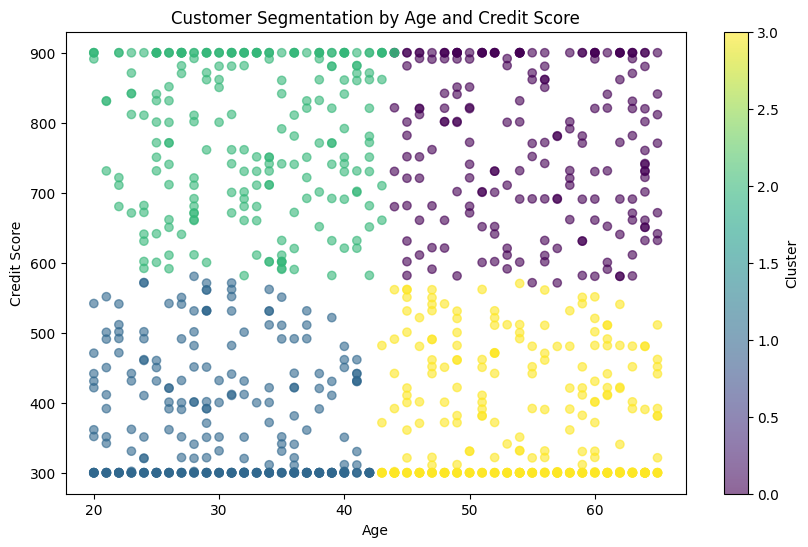

In [45]:
import matplotlib.pyplot as plt

# Define the features to visualize (e.g., 'Age' and 'Credit_Score')
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_data["Age"], merged_data["Credit_Score"], c=merged_data["Cluster"], cmap="viridis", alpha=0.6)

# Plot the data points colored by cluster
plt.colorbar(scatter, label='Cluster')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Customer Segmentation by Age and Credit Score')

# Show plot
plt.show()


#### T3.5: Using Lime/SHAP libraries, explain the prediction of your model and give inferences. (weightage- 4 marks) (ME)

In [46]:
#!pip install shap

import shap

def kmeans_predict(data):
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(transformed_df)
    return kmeans.predict(data)

sample_data = transformed_df.sample(100, random_state=42)

explainer = shap.KernelExplainer(kmeans_predict, sample_data)

shap_values = explainer.shap_values(sample_data, nsamples=100)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], sample_data.iloc[0])

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
X does not have valid feature names, but KMeans was fitted with feature names
  0%|          | 0/100 [00:00<?, ?it/s]The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
X does not have valid feature names, but KMeans was fitted with feature names
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
X does not have valid feature names, but KMeans was fitted with feature names
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
X does not have valid feature names, but KMeans was fitted with feature names
The defa

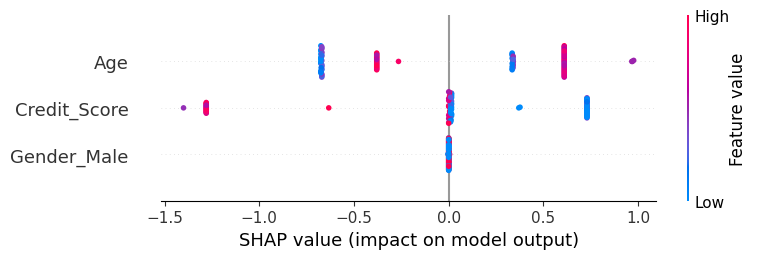

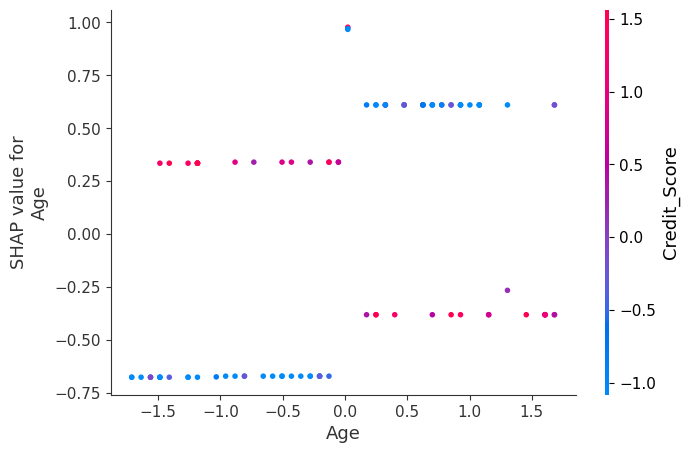

In [47]:
shap.summary_plot(shap_values, sample_data)

shap.dependence_plot("Age", shap_values, sample_data)

#### T3.6: Deploy a model using Flask / Streamlit. (weightage - 15 marks) (ME)

#### NOTE:
Flask is a lightweight web framework for Python, making it ideal for building and deploying simple web applications. To deploy a model with Flask, first, the trained model is serialized and saved to disk. Then, a Flask application is created, defining routes to handle incoming HTTP requests and serve model predictions. Once the Flask server is up and running, clients can send requests containing input data, and the server responds with predictions generated by the deployed model. Flask provides flexibility and simplicity in deploying machine learning models

### Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF. (weightage - 15 marks) (ME)

### Final Submission guidelines:

* Download the Jupyter notebook in the format of html.
* Upload it in the lumen (UNext LMS)
* Take a screenshot of T3.6 (Deployment) and upload it in the lumen (UNext LMS)
* Summarized PPT/ PDF prepared in Task 4 to be uploaded in the lumen (UNext LMS)

-------------------------------------------------- **ASSESSMENT ENDS HERE** ---------------------------------------------------------